In [3]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, meanabs
from matplotlib import pyplot as plt
import pandas as pd


In [5]:
asin_df = pd.read_csv('data/asin_details.csv')
term_df = pd.read_csv('data/raw_term_sample.csv')

In [6]:
asin_df

,term,asin,title,category,subcategory,brand,list_price_amount,list_price_currency,image_url
0,1 1/2 inch binders 3 ring,B00006IEM6,"Avery Economy Showcase View 3 Ring Binder, 1-1...",Office Product,Office Product,AVERY,8.59,USD,https://m.media-amazon.com/images/I/414h1m61FI...
1,1 1/2 inch binders 3 ring,B00A45VHPS,"Cardinal Economy 3-Ring Binders, 1.5"", Round R...",Office Product,Office Product,Cardinal,42.99,USD,https://m.media-amazon.com/images/I/41cHDfz3+i...
2,1 1/2 inch binders 3 ring,B07FMXC5YC,"Samsill Economy 1.5 Inch 3 Ring Binder, Made i...",Office Product,Office Product,Samsill,20.39,USD,https://m.media-amazon.com/images/I/51Jo6EMCv6...
3,1/2 inch binder,B001B0GG1A,"Avery Durable View 3 Ring Binder, 1/2 Inch Sla...",Office Product,Office Product,AVERY,7.20,USD,https://m.media-amazon.com/images/I/41dzrdiA8w...
4,1/2 inch binder,B07FKXHP1H,"Samsill Economy 0.5 Inch 3 Ring Binder, Made i...",Office Product,Office Product,Samsill,19.15,USD,https://m.media-amazon.com/images/I/51Yd2GVT3b...
...,...,...,...,...,...,...,...,...,...
9250,zep foaming wall cleaner,B07N8K6KYH,"Zep INC Wall Wipes, 35 Count",Sports,NaN,Zep,8.09,USD,https://m.media-amazon.com/images/I/41dHrpfhdJ...
9251,zipper binder,B0B36JQCZ2,Case-It The Classic Zipper Binder - 2 Inch O-R...,Office Product,Office Product,Case it,26.99,USD,https://m.media-amazon.com/images/I/41juJzI8Nk...
9252,zipper binder,B0CNXTQ2GB,"SUNEE Zippered Binder Bag with Handle, 2-Inch ...",Other,Office Product,SUNEE,28.99,USD,https://m.media-amazon.com/images/I/31xYjKlWCF...
9253,zipper binder,B0CZ74KR3B,Sturdy 3 Ring Zipper Binder With Shoulder Stra...,Other,Shoes,ZICOTO,34.99,USD,https://m.media-amazon.com/images/I/41lcXSIi6d...


In [7]:
term_df

,term,date,rank,estimated_search_volume
0,1 1/2 inch binders 3 ring,2024-04-13,144727,184.0
1,1 1/2 inch binders 3 ring,2024-04-20,149820,179.0
2,1 1/2 inch binders 3 ring,2024-04-27,139326,191.0
3,1 1/2 inch binders 3 ring,2024-05-04,146637,182.0
4,1 1/2 inch binders 3 ring,2024-05-11,144622,185.0
...,...,...,...,...
20455,zipper binder,2024-08-03,6199,2453.0
20456,zipper binder,2024-08-10,4843,2947.0
20457,zipper binder,2024-08-17,4788,2972.0
20458,zipper binder,2024-08-24,6558,2351.0


In [8]:
stacked_df = term_df[['term', 'date', 'estimated_search_volume']].set_index(['term','date'])
stacked_df

estimated_search_volume
term                      date                               
1 1/2 inch binders 3 ring 2024-04-13                    184.0
                          2024-04-20                    179.0
                          2024-04-27                    191.0
                          2024-05-04                    182.0
                          2024-05-11                    185.0
...                                                       ...
zipper binder             2024-08-03                   2453.0
                          2024-08-10                   2947.0
                          2024-08-17                   2972.0
                          2024-08-24                   2351.0
                          2024-08-31                   1888.0

[20460 rows x 1 columns]

In [9]:
unstacked_df = stacked_df.unstack(level=0).reset_index()
unstacked_df

date estimated_search_volume                            \
term                          #2 pencils 1 1/2 inch binders 3 ring   
0     2024-04-13                   281.0                     184.0   
1     2024-04-20                   268.0                     179.0   
2     2024-04-27                   258.0                     191.0   
3     2024-05-04                   269.0                     182.0   
4     2024-05-11                   265.0                     185.0   
5     2024-05-18                   249.0                     183.0   
6     2024-05-25                   255.0                     192.0   
7     2024-06-01                   272.0                     179.0   
8     2024-06-08                   323.0                     210.0   
9     2024-06-15                   355.0                     240.0   
10    2024-06-22                   408.0                     227.0   
11    2024-06-29                   537.0                     304.0   
12    2024-07-06                   722.0                     391.0   
13    2024-07-13                  1415.0                     708.0   
14    2024-07-27                  2370.0                    1240.0   
15    2024-08-03                  2687.0                    1498.0   
16    2024-08-10                  2977.0                    1820.0   
17    2024-08-17                  2193.0                    1857.0   
18    2024-08-24                  1806.0                    1313.0   
19    2024-08-31                  1176.0                    1051.0   

                                                          \
term 1 inch binder 1 inch binders 3 ring 1.5 inch binder   
0            384.0                 990.0           151.0   
1            389.0                 957.0           127.0   
2            367.0                 978.0           118.0   
3            386.0                 950.0           134.0   
4            380.0                 965.0           125.0   
5            437.0                1021.0           136.0   
6            433.0                1051.0           142.0   
7            409.0                 989.0           134.0   
8            484.0                1147.0           160.0   
9            447.0                1085.0           148.0   
10           497.0                1159.0           175.0   
11           620.0                1394.0           216.0   
12           739.0                1682.0           254.0   
13          1223.0                2935.0           429.0   
14          2208.0                5569.0           856.0   
15          3107.0                8735.0          1177.0   
16          4093.0               12314.0          1539.0   
17          4588.0               13359.0          1742.0   
18          3800.0               10179.0          1445.0   
19          3016.0                7192.0          1186.0   

                                                                      \
term 1.5 inch binders 3 ring 1/2 inch binder 1/2 inch binders 3 ring   
0                      420.0           156.0                   579.0   
1                      456.0           142.0                   577.0   
2                      417.0           157.0                   584.0   
3                      440.0           164.0                   551.0   
4                      452.0           142.0                   548.0   
5                      453.0           165.0                   568.0   
6                      487.0           160.0                   551.0   
7                      463.0           155.0                   516.0   
8                      541.0           175.0                   610.0   
9                      552.0           158.0                   604.0   
10                     603.0           157.0                   528.0   
11                     712.0           191.0                   562.0   
12                     926.0           202.0                   574.0   
13                    1578.0           291.0                   895.0  

In [12]:
terms = list(set(term_df['term']))
terms

['21 jump street',
 'mr inbetween',
 'christmas',
 'vibration plate exercise machine',
 'loose leaf paper',
 'lymphatic drainage supplements',
 'college backpack',
 'crayola washable markers',
 'dirndl dresses women',
 'horror movies free to me',
 'scientific calculators',
 'clear pencil case',
 'the grand tour',
 'alien',
 'lab notebook',
 'moonbrew',
 'birkenstock clogs',
 'nocticadia',
 'five star folders',
 'notre dame apparel',
 'school planner',
 'pink backpack',
 'youth football mouth guard',
 'binder dividers with pockets',
 'name tags for classroom',
 'tinkerbell costume for women',
 'the prince of egypt',
 '3x5 index cards',
 'the perks of being a wallflower',
 'princess backpack',
 'batman costume adult',
 'glp-1',
 'halloween inflatables',
 'tap shoes for toddler girls',
 'uglies',
 'silicone chair leg floor protectors',
 'civ',
 'oversized sweaters for women',
 'backpack for kids',
 'beetlejuice costume',
 'backpack for school',
 'halloween lights',
 'jordan backpack',
 't

In [14]:

term_stats_list = []

for index, term in enumerate(terms):
    print(f'({index + 1} / {len(terms)}) Processing -> {term}')
    x = sm.add_constant(unstacked_df.index)
    y = unstacked_df[('estimated_search_volume', term)]
    
    model = sm.OLS(y,x)
    results = model.fit()
    params = results.params
    const = params.const
    slope = params.x1
    y_hat = unstacked_df.index.map(lambda x: const + x * slope)
    
    term_mse = mse(y, y_hat)
    term_mea = meanabs(y, y_hat)
    term_relative_mea = term_mea / y.mean()
    
    term_stats_list.append({
        'term': term,
        'term_relative_mea': term_relative_mea,
        'term_mea': term_mea,
        'term_mse': term_mse
    })
    
    
term_stats_df = pd.DataFrame(term_stats_list)
term_stats_df = term_stats_df.sort_values(by=['term_relative_mea'], ascending=True)
term_stats_df = term_stats_df.reset_index()

term_stats_df

(1 / 1023) Processing -> 21 jump street
(2 / 1023) Processing -> mr inbetween
(3 / 1023) Processing -> christmas
(4 / 1023) Processing -> vibration plate exercise machine
(5 / 1023) Processing -> loose leaf paper
(6 / 1023) Processing -> lymphatic drainage supplements
(7 / 1023) Processing -> college backpack
(8 / 1023) Processing -> crayola washable markers
(9 / 1023) Processing -> dirndl dresses women
(10 / 1023) Processing -> horror movies free to me
(11 / 1023) Processing -> scientific calculators
(12 / 1023) Processing -> clear pencil case
(13 / 1023) Processing -> the grand tour
(14 / 1023) Processing -> alien
(15 / 1023) Processing -> lab notebook
(16 / 1023) Processing -> moonbrew
(17 / 1023) Processing -> birkenstock clogs
(18 / 1023) Processing -> nocticadia
(19 / 1023) Processing -> five star folders
(20 / 1023) Processing -> notre dame apparel
(21 / 1023) Processing -> school planner
(22 / 1023) Processing -> pink backpack
(23 / 1023) Processing -> youth football mouth guar

,index,term,term_relative_mea,term_mea,term_mse
0,499,40th birthday decorations for women,0.089396,76.719699,8.932520e+03
1,348,bagsmart tote bag,0.152567,144.016015,3.116161e+04
2,447,flea bombs for home indoor,0.155730,105.779398,1.684153e+04
3,2,christmas,0.158556,188.983158,5.089237e+04
4,96,marukyu koyamaen,0.161109,117.214662,2.478806e+04
...,...,...,...,...,...
1018,632,car cane,1.482592,1164.427519,3.789728e+06
1019,304,estrogen cream for women menopause,1.511860,1312.521128,4.005900e+06
1020,928,prime day deals today 2024,1.521449,15999.862707,1.168443e+09
1021,234,madness shantel tessier,1.634792,3184.330000,3.065310e+07


(1 / 20) Processing -> "40th birthday decorations for women"


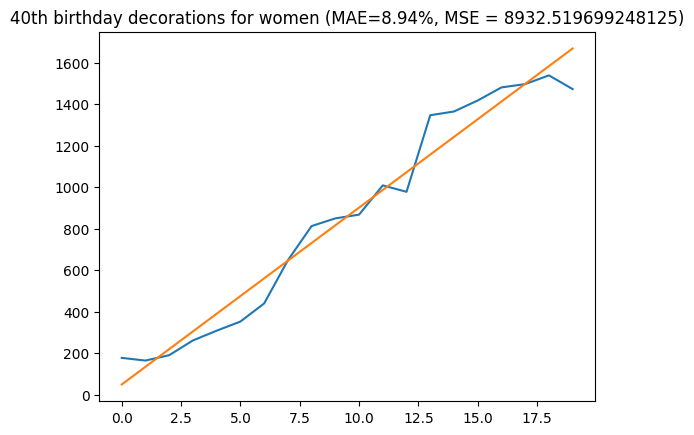

(2 / 20) Processing -> "bagsmart tote bag"


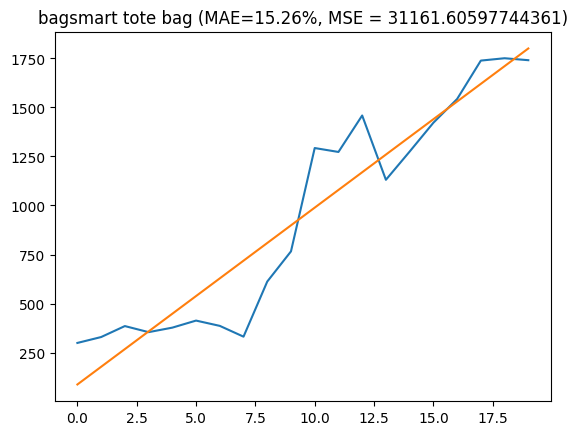

(3 / 20) Processing -> "flea bombs for home indoor"


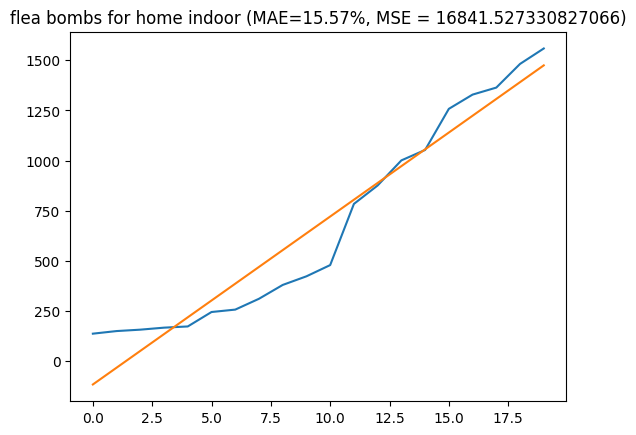

(4 / 20) Processing -> "christmas"


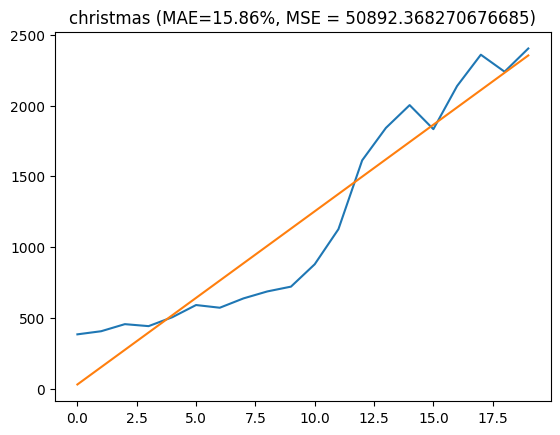

(5 / 20) Processing -> "marukyu koyamaen"


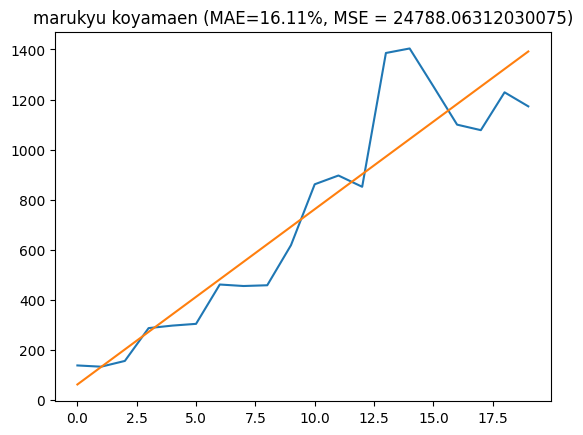

(6 / 20) Processing -> "toshiba rice cooker"


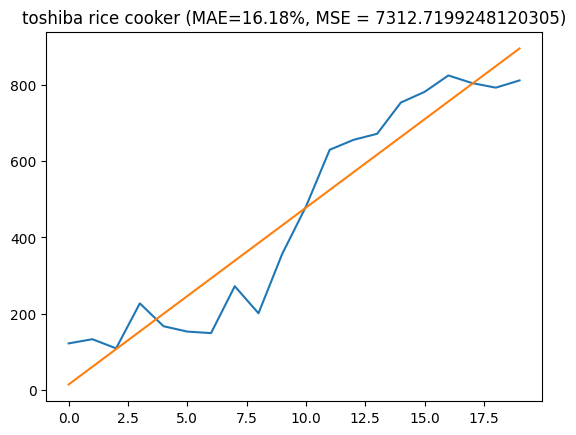

(7 / 20) Processing -> "car window shades for side window"


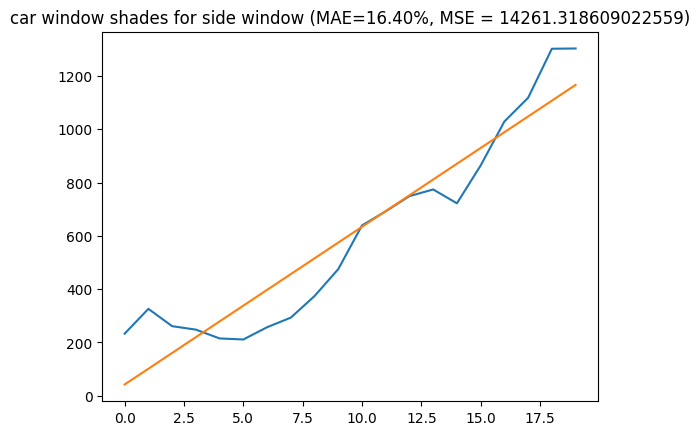

(8 / 20) Processing -> "clippers for men"


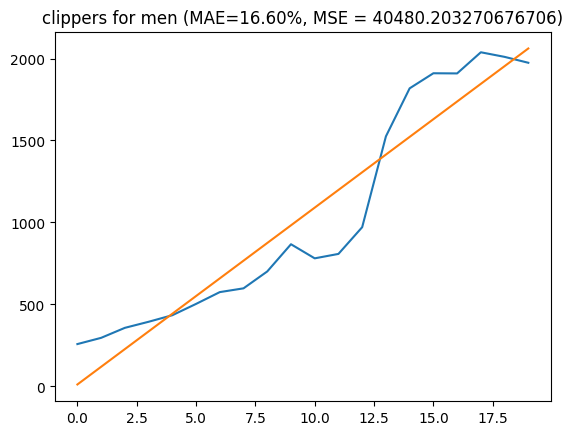

(9 / 20) Processing -> "levi jeans women"


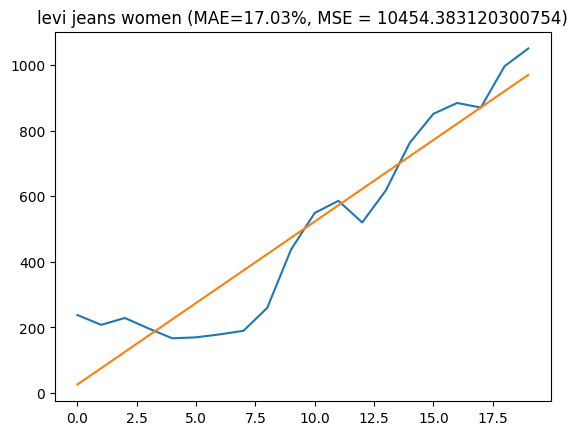

(10 / 20) Processing -> "academic planner 2024-2025"


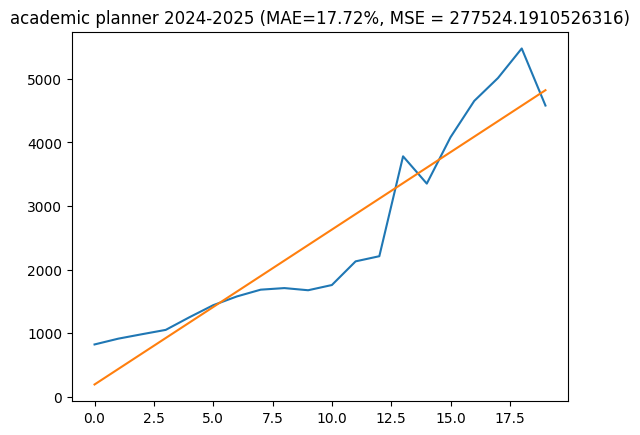

(11 / 20) Processing -> "turkey lunch meat"


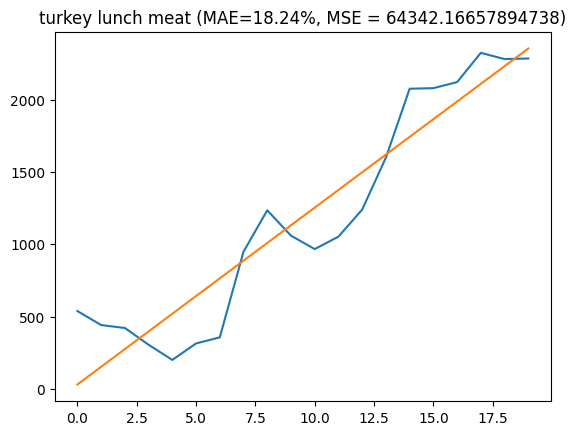

(12 / 20) Processing -> "teething toys 3-6 months"


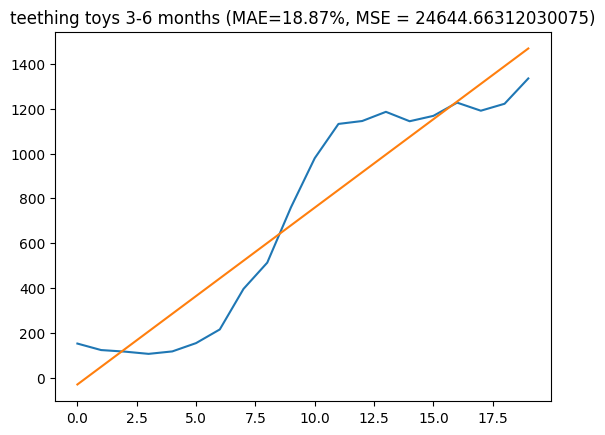

(13 / 20) Processing -> "covid"


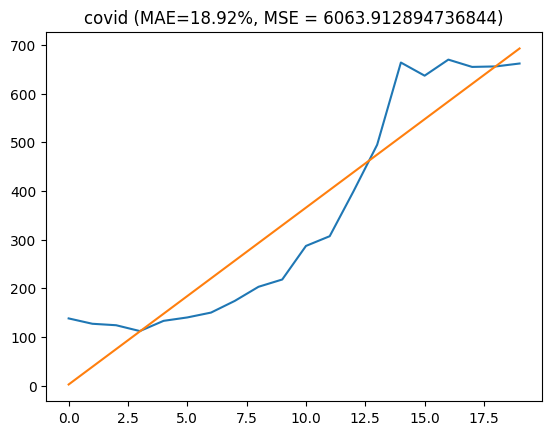

(14 / 20) Processing -> "the vampire diaries"


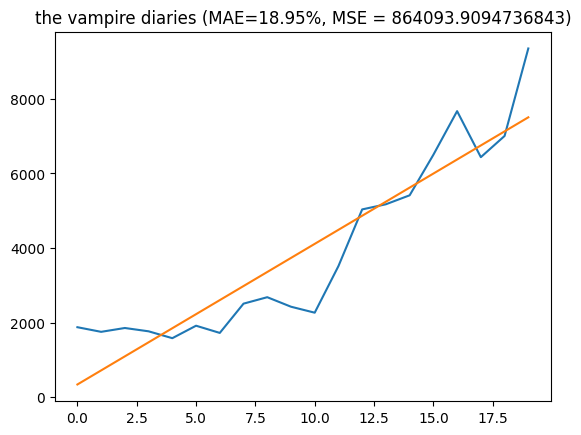

(15 / 20) Processing -> "paw trimmer for dogs"


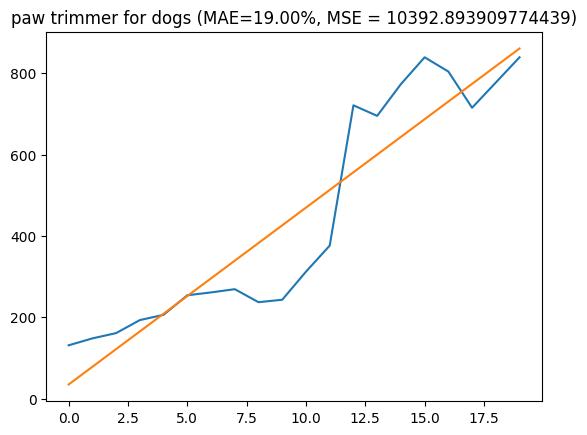

(16 / 20) Processing -> "toothpaste fluoride free"


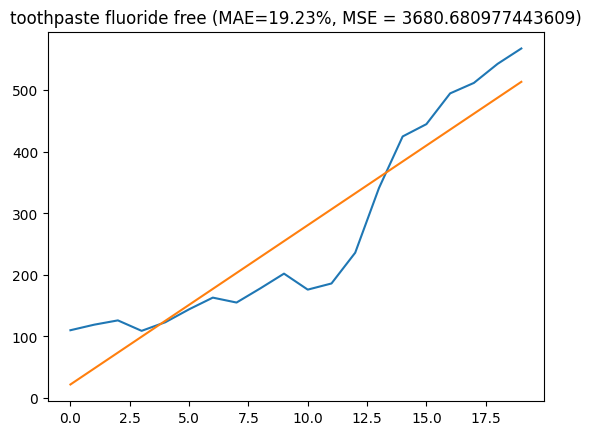

(17 / 20) Processing -> "pelonis fan"


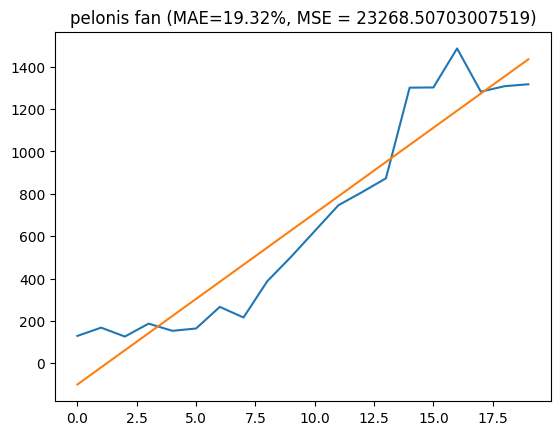

(18 / 20) Processing -> "vibration plate exercise machine"


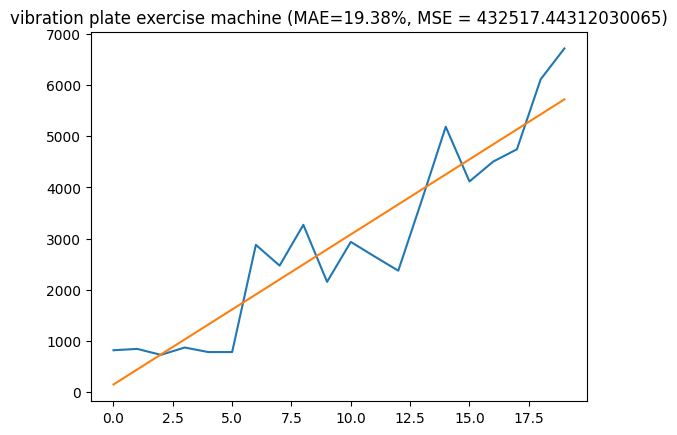

(19 / 20) Processing -> "newborn halloween costume"


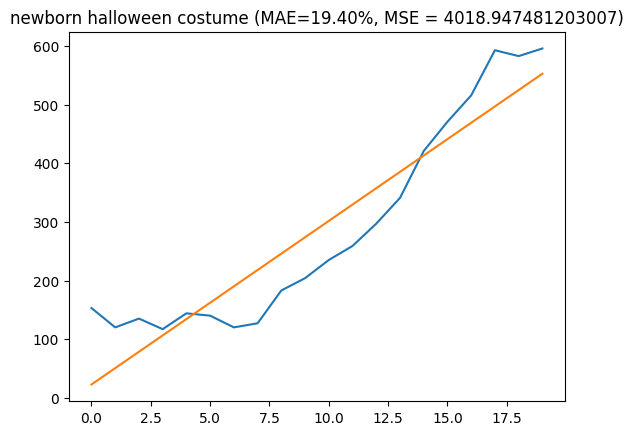

(20 / 20) Processing -> "the handmaid's tale"


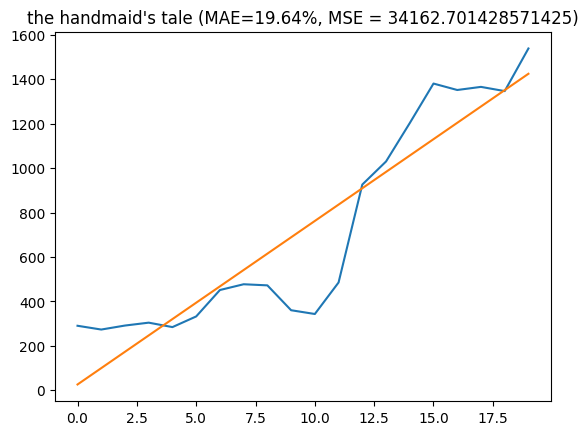

In [21]:
num_terms_to_plot = 20
subset_index = 0

for index, row in term_stats_df[subset_index * num_terms_to_plot : (subset_index + 1) * num_terms_to_plot].iterrows():
    term = row['term']
    print(f'({index + 1} / {num_terms_to_plot}) Processing -> "{term}"')
    x = sm.add_constant(unstacked_df.index)
    y = unstacked_df[('estimated_search_volume', term)]

    model = sm.OLS(y,x)
    results = model.fit()
    params = results.params
    const = params.const
    slope = params.x1
    y_hat = unstacked_df.index.map(lambda x: const + x * slope)
    
    term_mse = mse(y, y_hat)
    term_mea = meanabs(y, y_hat)
    term_relative_mea = term_mea / y.mean()
    
    plt.plot(unstacked_df.index, unstacked_df[('estimated_search_volume', term)])
    plt.plot(unstacked_df.index, y_hat)
    plt.title(f'{term} (MAE={100 * term_relative_mea:,.2f}%, MSE = {term_mse})')
    plt.show()

In [22]:
selected_term = 'marukyu koyamaen'